In [2]:
# # Загрузите датасет digits с помощью функции load_digits из 
# sklearn.datasets и подготовьте матрицу признаков X и ответы 
# на обучающей выборке y (вам потребуются поля data и target в
#                         объекте, который возвращает load_digits).
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

digits = load_digits()
print(digits.data.shape)


(1797, 64)


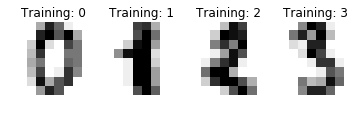

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [9]:
X = digits.data
y = digits.target

In [12]:
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
scores = cross_validation.cross_val_score(clf, X, y, cv=10)

In [13]:
scores.mean()

0.83033372347388534

In [19]:
# Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над
# DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, 
# задав только количество деревьев равным 100.

# Качество классификации новой модели - ответ в пункте 2. Обратите внимание, 
# как соотносится качество работы композиции решающих деревьев с качеством работы 
# одного решающего дерева.
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier (base_estimator = clf, n_estimators=100, random_state = 0)
scores = cross_validation.cross_val_score(bg, X, y, cv=10)
scores.mean()

0.92431369208250391

In [20]:
# same shit на корень из числа признаков
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier (base_estimator = clf, n_estimators=100, random_state = 0, max_features = 0.125)
scores = cross_validation.cross_val_score(bg, X, y, cv=10)
scores.mean()

0.9371592754479845

In [27]:
clf = DecisionTreeClassifier(random_state=0, splitter = 'random', max_features = 0.125)
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier (base_estimator = clf, n_estimators=100, random_state = 0)                       
scores = cross_validation.cross_val_score(bg, X, y, cv=10)
scores.mean()

0.95776677591771553

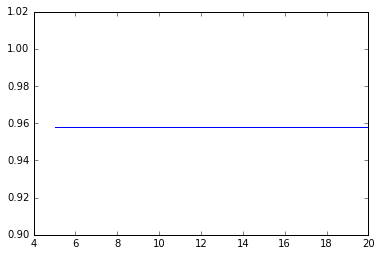

In [33]:
scors = []
for i in xrange(5, 25, 5):
    bg = BaggingClassifier (base_estimator = clf, n_estimators=100, random_state = 0)                       
    scores = cross_validation.cross_val_score(bg, X, y, cv=10)
    scors.append(scores.mean())

plt.plot(xrange(5, 25, 5), scors)
plt.show()